# **Handson OpenCV**-5

In [3]:
# Importing Neccessary Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

In [3]:
#user input for color and operation
# Open the webcam
cap = cv2.VideoCapture(0)

# Define the HSV ranges for different colors
colors = {
    'red': (np.array([0, 50, 50]), np.array([10, 255, 255])),
    'blue': (np.array([100, 50, 50]), np.array([140, 255, 255])),
    'green': (np.array([40, 50, 50]), np.array([80, 255, 255])),
    'yellow': (np.array([20, 50, 50]), np.array([30, 255, 255])),
    'cyan': (np.array([80, 50, 50]), np.array([100, 255, 255])),
    'magenta': (np.array([140, 50, 50]), np.array([160, 255, 255])),
    'white': (np.array([0, 0, 0]), np.array([0, 0, 255])),
    'black': (np.array([0, 0, 0]), np.array([0, 0, 0]))
}

# Ask the user for the color they want to extract
color_name = input("Which color would you like to extract? Enter 'red', 'blue', 'green', 'yellow', 'cyan', 'magenta', 'white', or 'black': ")

# Get the HSV range for the chosen color
lower_color, upper_color = colors.get(color_name, (np.array([0, 0, 0]), np.array([0, 0, 0])))

# Ask the user for the operation they want to perform
operation = input("Which operation would you like to perform? Enter 'NOT', 'AND', 'NAND', 'NOR': ")

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Threshold the HSV image to get only the specified color
    mask = cv2.inRange(hsv, lower_color, upper_color)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame, frame, mask=mask)

    # Perform the operation
    if operation.upper() == 'NOT':
        # Perform NOT operation
        res = cv2.bitwise_not(res)
    elif operation.upper() == 'AND':
        # Perform AND operation
        res = cv2.bitwise_and(frame, frame, mask=mask)
    elif operation.upper() == 'NAND':
        # Perform NAND operation
        res = cv2.bitwise_not(cv2.bitwise_and(frame, frame, mask=mask))
    elif operation.upper() == 'NOR':
        # Perform NOR operation
        res = cv2.bitwise_not(cv2.bitwise_or(frame, frame, mask=mask))
    else:
        print("Invalid operation. Please enter 'NOT', 'AND', 'NAND', or 'NOR'.")

    # Display the resulting frame
    cv2.imshow('Result', res)

    # Break the loop on 'ESC' key press
    if cv2.waitKey(1) & 0xFF == 27:  # 27 is the ASCII value of 'ESC'
        break

# When everything is done, release the capture and destroy the window
cap.release()
cv2.destroyAllWindows()


In [4]:
# opening all operation on same color
# Open the webcam
cap = cv2.VideoCapture(0)

# Define the HSV ranges for different colors
colors = {
    'red': (np.array([0, 50, 50]), np.array([10, 255, 255])),
    'blue': (np.array([100, 50, 50]), np.array([140, 255, 255])),
    'green': (np.array([40, 50, 50]), np.array([80, 255, 255])),
    'yellow': (np.array([20, 50, 50]), np.array([30, 255, 255])),
    'cyan': (np.array([80, 50, 50]), np.array([100, 255, 255])),
    'magenta': (np.array([140, 50, 50]), np.array([160, 255, 255])),
    'white': (np.array([0, 0, 0]), np.array([0, 0, 255])),
    'black': (np.array([0, 0, 0]), np.array([0, 0, 0]))
}

# Ask the user for the color they want to extract
color_name = input("Which color would you like to extract? Enter 'red', 'blue', 'green', 'yellow', 'cyan', 'magenta', 'white', or 'black': ")

# Get the HSV range for the chosen color
lower_color, upper_color = colors.get(color_name, (np.array([0, 0, 0]), np.array([0, 0, 0])))

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Threshold the HSV image to get only the specified color
    mask = cv2.inRange(hsv, lower_color, upper_color)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame, frame, mask=mask)

    # Perform the operations and display the results in separate windows
    cv2.imshow(f'{color_name} NOT', cv2.bitwise_not(res))
    cv2.imshow(f'{color_name} AND', cv2.bitwise_and(frame, frame, mask=mask))
    cv2.imshow(f'{color_name} NAND', cv2.bitwise_not(cv2.bitwise_and(frame, frame, mask=mask)))
    cv2.imshow(f'{color_name} NOR', cv2.bitwise_not(cv2.bitwise_or(frame, frame, mask=mask)))

    # Break the loop on 'ESC' key press
    if cv2.waitKey(1) & 0xFF == 27:  # 27 is the ASCII value of 'ESC'
        break

# When everything is done, release the capture and destroy the window
cap.release()
cv2.destroyAllWindows()


In [ ]:
Divide the image into 16 equal parts.
Plot the local histograms of each of the 16 sub-images with each sub-image infront of its histogram.
Equalize the histograms of the 16 sub-images and plot the equalized sub-images in a 4x4 grid.
Join the equalized sub-images back together.
Compare the result with the histogram-equalized original image.

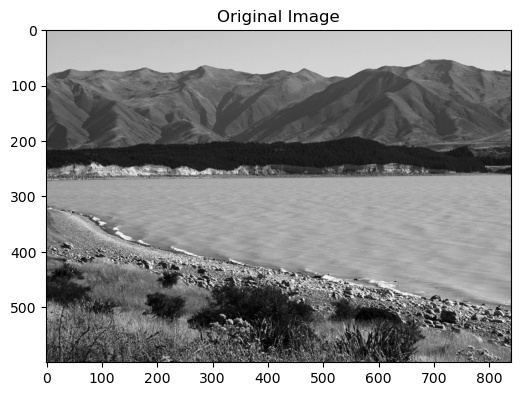

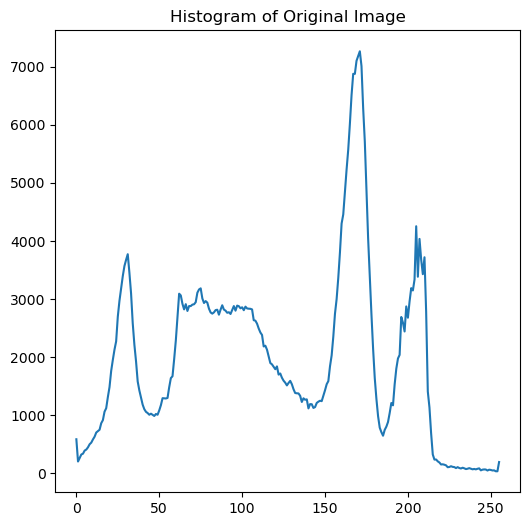

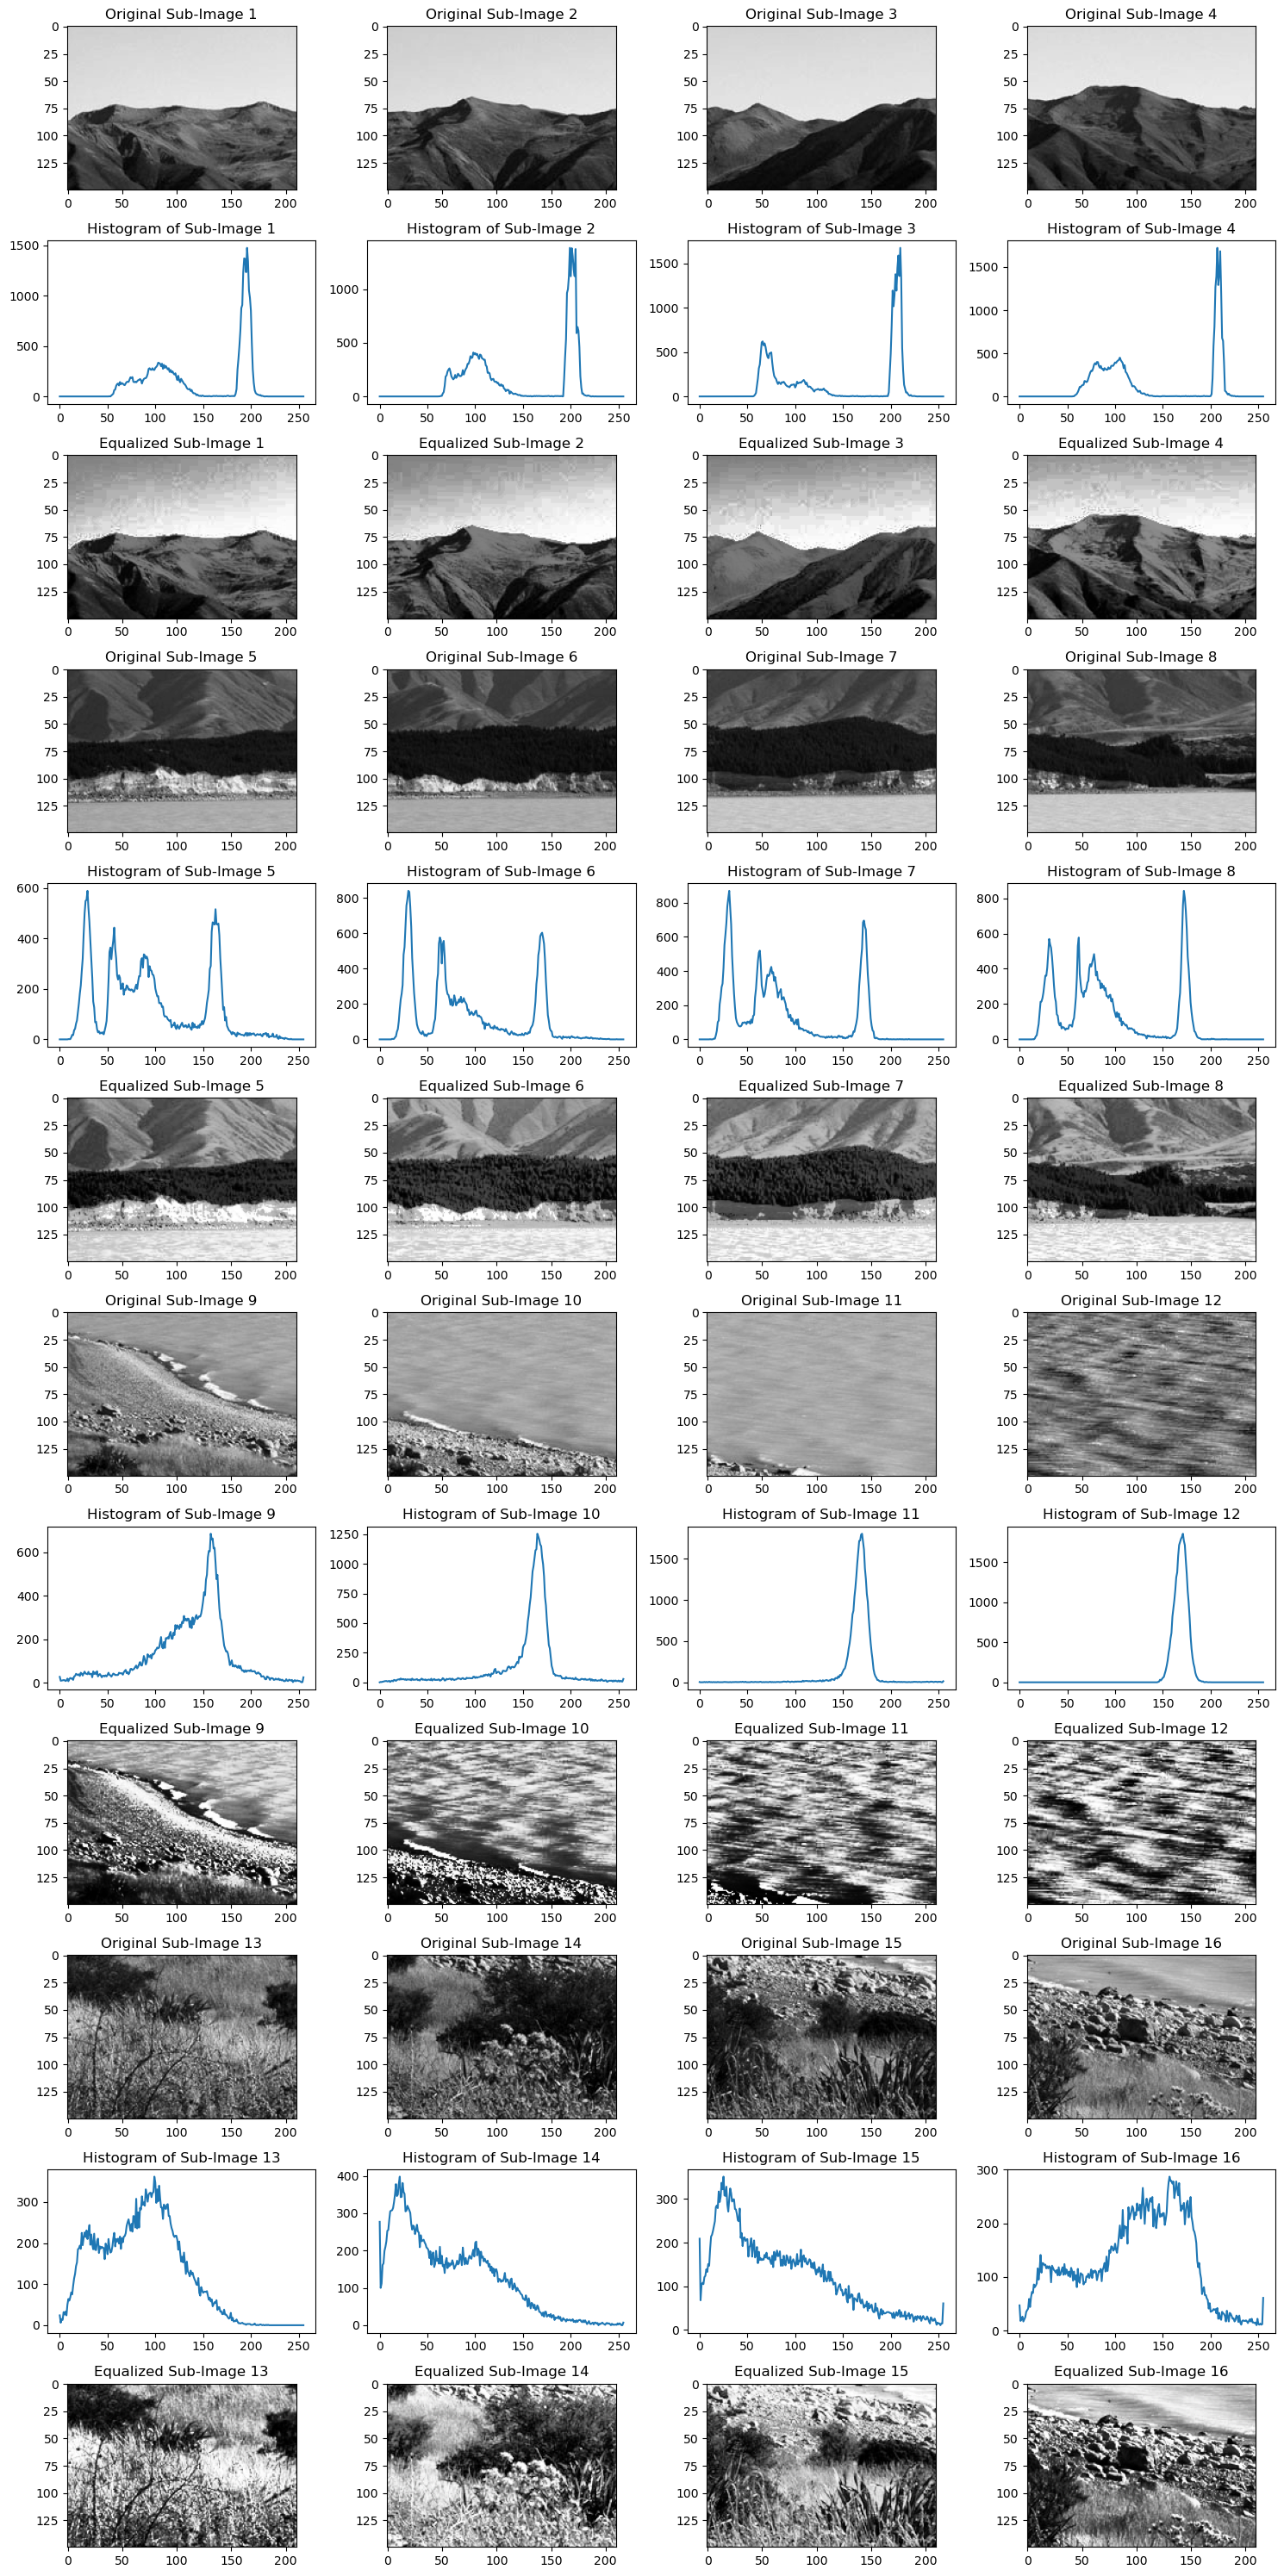

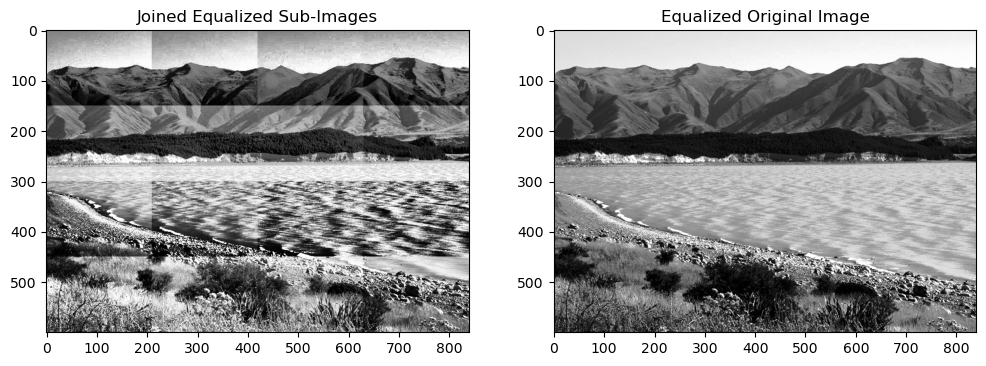

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('New_Zealand_Lake.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

# Calculate the histogram of the original image
hist = cv2.calcHist([img], [0], None, [256], [0,256])

# Display the histogram of the original image
plt.figure(figsize=(6, 6))
plt.plot(hist)
plt.title('Histogram of Original Image')
plt.show()

# Calculate the dimensions of the sub-images
height, width = img.shape
sub_img_height = height // 4
sub_img_width = width // 4

# Create a list to hold the sub-images and their histograms
sub_images = []
histograms = []

for i in range(4):
    for j in range(4):
        # Extract the sub-image
        sub_img = img[i*sub_img_height:(i+1)*sub_img_height, j*sub_img_width:(j+1)*sub_img_width]
        sub_images.append(sub_img)

        # Calculate and store the histogram
        hist = cv2.calcHist([sub_img], [0], None, [256], [0,256])
        histograms.append(hist)

# Equalize the histograms of the sub-images
equalized_sub_images = [cv2.equalizeHist(img) for img in sub_images]

# Plot the original sub-images, histograms and equalized sub-images in a 4x4 grid
fig, axs = plt.subplots(12, 4, figsize=(15, 30))

for i in range(4):
    for j in range(4):
        # Plot the original sub-image
        axs[3*i, j].imshow(sub_images[4*i+j], cmap='gray')
        axs[3*i, j].set_title(f'Original Sub-Image {4*i+j+1}')
        
        # Plot the histogram
        axs[3*i+1, j].plot(histograms[4*i+j])
        axs[3*i+1, j].set_title(f'Histogram of Sub-Image {4*i+j+1}')
        
        # Plot the equalized sub-image
        axs[3*i+2, j].imshow(equalized_sub_images[4*i+j], cmap='gray')
        axs[3*i+2, j].set_title(f'Equalized Sub-Image {4*i+j+1}')

plt.tight_layout()
plt.show()

# Join the equalized sub-images back together
equalized_img = np.block([[equalized_sub_images[4*i+j] for j in range(4)] for i in range(4)])

# Equalize the histogram of the original image
equalized_original_img = cv2.equalizeHist(img)

# Compare the two images using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(equalized_img, cmap='gray')
plt.title('Joined Equalized Sub-Images')
plt.subplot(1, 2, 2)
plt.imshow(equalized_original_img, cmap='gray')
plt.title('Equalized Original Image')
plt.show()
